# Bank Churn Rate Problem / Virgilio Madrid

## Import Libraries

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data

In [67]:
#Dataset obtained from Kaggle - https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn/data

# Load the data
file_path = "Customer-Churn-Records.csv"

df = pd.read_csv(file_path)

## Explore Data

####
- RowNumber—corresponds to the record (row) number and has no effect on the output.
- CustomerId—contains random values and has no effect on customer leaving the bank.
- Surname—the surname of a customer has no impact on their decision to leave the bank.
- CreditScore—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
- Geography—a customer’s location can affect their decision to leave the bank.
- Gender—it’s interesting to explore whether gender plays a role in a customer leaving the bank.
- Age—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
- Tenure—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
- Balance—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
- NumOfProducts—refers to the number of products that a customer has purchased through the bank.
- HasCrCard—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
- IsActiveMember—active customers are less likely to leave the bank.
- EstimatedSalary—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
- Exited—whether or not the customer left the bank.
- Complain—customer has complaint or not.
- Satisfaction Score—Score provided by the customer for their complaint resolution.
- Card Type—type of card hold by the customer.
- Points Earned—the points earned by the customer for using credit card.

In [68]:
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377


In [69]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [70]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


## Questions to answer / Observations

- How does each field correlate with each other?
- We observed the labels are unbalanced, which data engineering technique should we use?
- Hypothesis:The greater the amount of years in the 'Tenure' field, the less exits
- Hypothesis: The greater the satisfaction score, the less exits
 

## Data Visualization

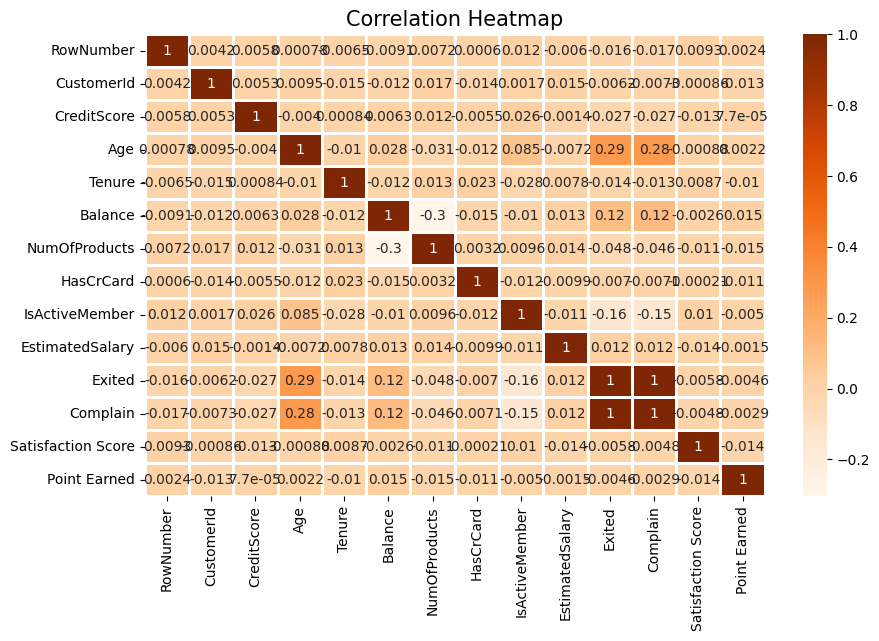

In [71]:
# See correlation between columns | look for multicollinearity
plt.figure(figsize=(10, 6))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='Oranges', linewidths=1)
plt.title('Correlation Heatmap', fontsize=15)
plt.show()

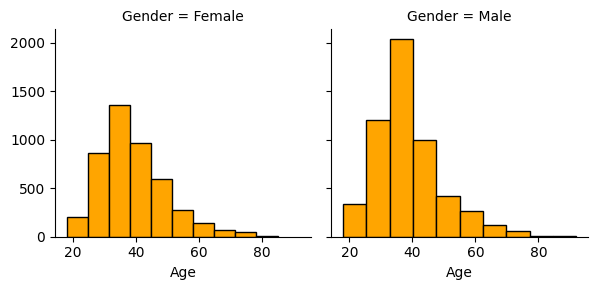

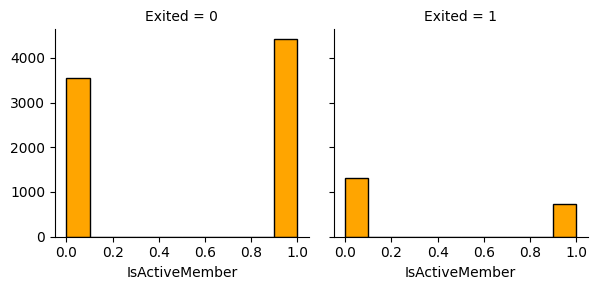

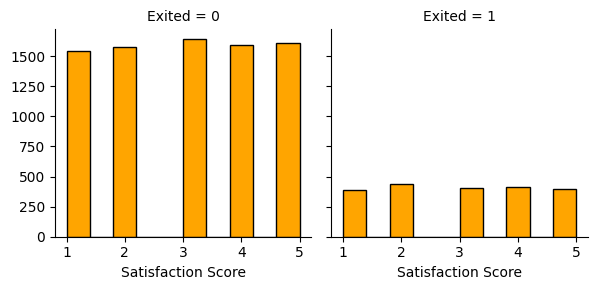

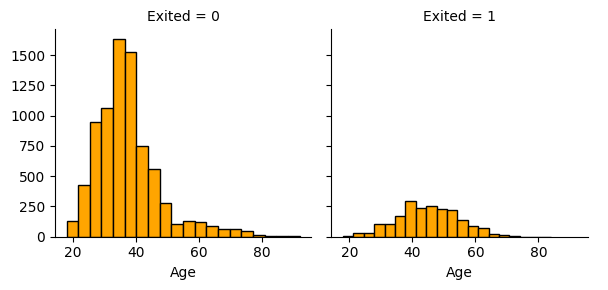

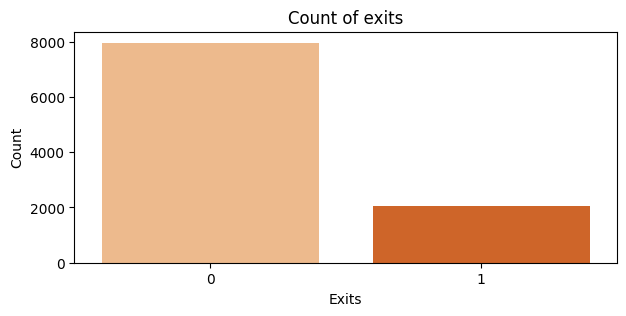

Percent of exits: 2038/7962=25.6%


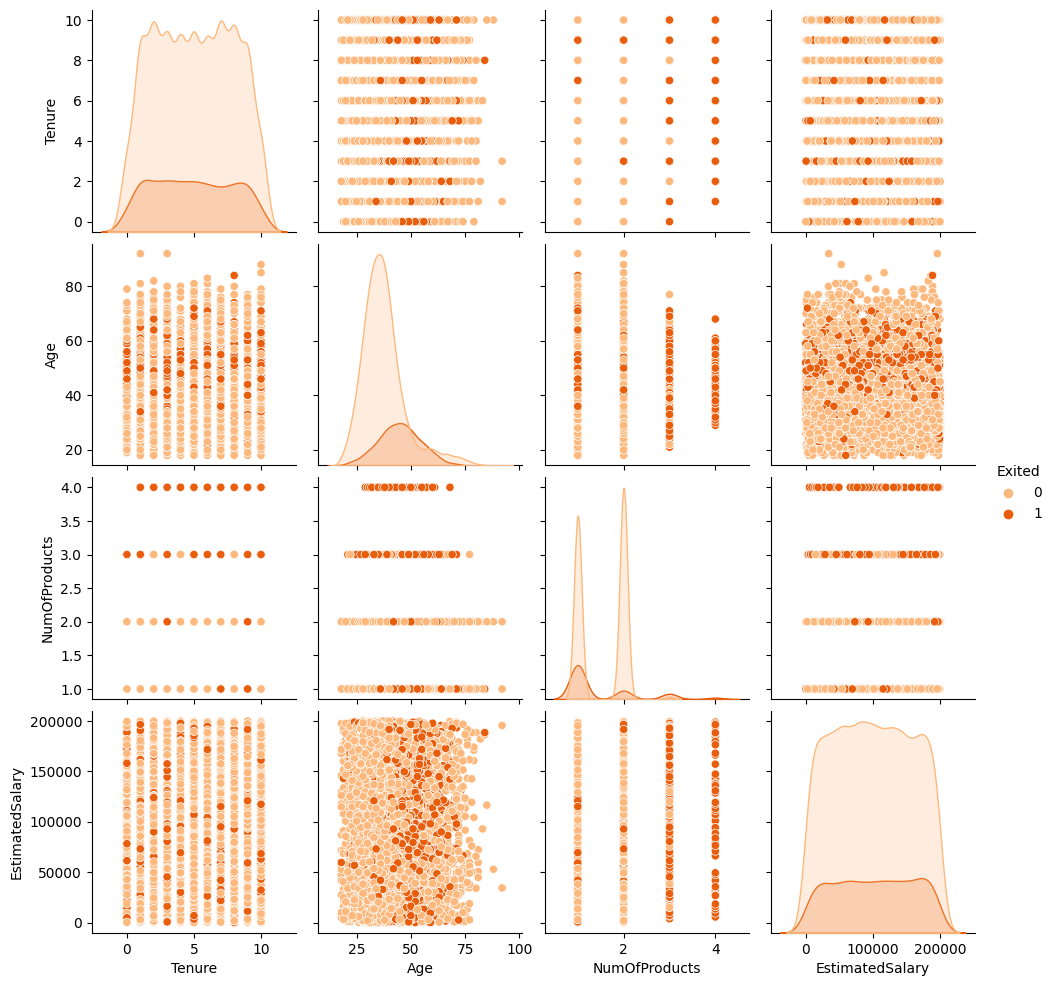

In [72]:
"""
from imblearn.under_sampling import RandomUnderSampler

df_undersample = df.copy()
X_plot = df_undersample.drop('Exited', axis=1)
y_plot= df_undersample['Exited']

# Initialize undersampler to balance the data | Avoiding overfitting and bias
rus = RandomUnderSampler(random_state=42)

# Resample the dataset
X_plot_undersample, y_plot_undersample = rus.fit_resample(X_plot, y_plot)
rus = RandomUnderSampler(random_state=42)

#Dataframe to visualize after undersampling
df_plot_undersample = pd.concat([X_plot_undersample, y_plot_undersample], axis=1)

"""
#Dataframe used for plotting
# Use df to plot the original data
#Use df_plot_undersample to plot the undersampled data
df_plot=df

# Plotting the distribution of the Age and Gender
g = sns.FacetGrid(df_plot, col='Gender', height=3)
g.map(plt.hist, 'Age', bins=10, color='orange', edgecolor='black')
g.add_legend()
plt.show()

# Plotting the distribution of IsActiveMember vs Exits
g = sns.FacetGrid(df_plot, col='Exited', height=3)
g.map(plt.hist, 'IsActiveMember', bins=10, color='orange', edgecolor='black')
g.add_legend()
plt.show()

# Plotting the distribution of Satisfaction Score vs Exits
g = sns.FacetGrid(df_plot, col='Exited', height=3)
g.map(plt.hist, 'Satisfaction Score', bins=10, color='orange', edgecolor='black')
g.add_legend()
plt.show()

# Plotting the distribution of Age vs Exits
g = sns.FacetGrid(df_plot, col='Exited', height=3)
g.map(plt.hist, 'Age', bins=20, color='orange', edgecolor='black')
g.add_legend()
plt.show()

# Counting the number of exited customers
plt.figure(figsize=(7, 3))
sns.countplot(x='Exited', data=df_plot, palette='Oranges')
plt.title('Count of exits')
plt.xlabel('Exits')
plt.ylabel('Count')
plt.show()
print(f"Percent of exits: {df_plot['Exited'].value_counts()[1]}/{df_plot['Exited'].value_counts()[0]}={round(df_plot['Exited'].value_counts()[1]/df_plot['Exited'].value_counts()[0],4)*100}%")

# Plotting the interaction between Age, Tenure, NumOfProducts, and Estimated Salary vs Exits
sns.pairplot(df_plot[['Exited','Tenure', 'Age', 'NumOfProducts','EstimatedSalary']], hue='Exited', palette='Oranges')
plt.show()


# See the interaction of the features NumOfProducts, Card Type, Gender, Geography vs Exits
import plotly.express as px
fig=px.parallel_categories(
    data_frame=df_plot,
    dimensions=['NumOfProducts','Card Type', 'Gender','Geography'],
    color='Exited',
    color_continuous_scale=px.colors.sequential.Oranges
)
fig.show()

### Data Engineering

In [73]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.preprocessing import StandardScaler

# Drop columns that are considered not relevant
df_reduced = df.drop(['CustomerId', 'Surname', 'Geography'], axis=1)

#Scale the data
scaler = StandardScaler() # this scaler scales from 0 to 1
df_reduced[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary','Satisfaction Score','Point Earned']] = scaler.fit_transform(df_reduced[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary','Satisfaction Score','Point Earned']])

# Applying One-hot encoding to columns with categorical data
df_encoded = pd.get_dummies(df_reduced, columns=[ 'Gender','Card Type'], drop_first=True)

df_encoded.info()

X = df_encoded.drop('Exited', axis=1)
y= df_encoded['Exited']

# Initialize undersampler to balance the data | Avoiding overfitting and bias
rus = RandomUnderSampler(random_state=42)

# Resample the dataset
X_resampled, y_resampled = rus.fit_resample(X, y)

# Print the number of instances after resampling
print(f"Before resampling: {Counter(y)}")
print(f"After resampling: {Counter(y_resampled)}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CreditScore         10000 non-null  float64
 2   Age                 10000 non-null  float64
 3   Tenure              10000 non-null  float64
 4   Balance             10000 non-null  float64
 5   NumOfProducts       10000 non-null  float64
 6   HasCrCard           10000 non-null  int64  
 7   IsActiveMember      10000 non-null  int64  
 8   EstimatedSalary     10000 non-null  float64
 9   Exited              10000 non-null  int64  
 10  Complain            10000 non-null  int64  
 11  Satisfaction Score  10000 non-null  float64
 12  Point Earned        10000 non-null  float64
 13  Gender_Male         10000 non-null  uint8  
 14  Card Type_GOLD      10000 non-null  uint8  
 15  Card Type_PLATINUM  10000 non-null  uint8  
 16  Card 

### Model Training and Picking

In [74]:

from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import datetime
from sklearn import tree

#List of models to evaluate
models = {
        'Random Forest': RandomForestClassifier(random_state=42, max_depth=1),
        'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
        'Support Vector Classifier': SVC(random_state=42),
        'Decision Tree': tree.DecisionTreeClassifier(random_state=42, max_depth=1),
        'Gradient Boosting': GradientBoostingClassifier(random_state=42, max_depth=1)
    }

# Split the data into training and testing sets 80/20
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Evaluate the models Function
def evaluate_model(model, X_train, Y_train, X_test, Y_test):
    t1=datetime.datetime.now()
    model.fit(X_train, Y_train)
    predict = model.predict(X_test)
    accuracy = metrics.accuracy_score(Y_test, predict)
    f1_score = metrics.f1_score(Y_test, predict)
    precision = metrics.precision_score(Y_test, predict)
    r2 = metrics.r2_score(Y_test, predict)
    t2=datetime.datetime.now()
    return {'Accuracy':round(accuracy*100,2)}, {'f1_score:':round(f1_score*100,2)}, {'precision:':round(precision*100,2)},{'R2':round(r2*100,2)},{"miliseconds":((t2-t1).microseconds)/1000}

# Evaluate the models
for m in models:
    print(f"Model: {m}")
    print(evaluate_model(models[m], X_train, Y_train, X_test, Y_test))


Model: Random Forest
({'Accuracy': 99.75}, {'f1_score:': 99.73}, {'precision:': 100.0}, {'R2': 99.01}, {'miliseconds': 167.261})
Model: Logistic Regression
({'Accuracy': 99.75}, {'f1_score:': 99.73}, {'precision:': 100.0}, {'R2': 99.01}, {'miliseconds': 109.79})
Model: Support Vector Classifier
({'Accuracy': 45.71}, {'f1_score:': 59.25}, {'precision:': 45.1}, {'R2': -118.77}, {'miliseconds': 442.756})
Model: Decision Tree
({'Accuracy': 99.75}, {'f1_score:': 99.73}, {'precision:': 100.0}, {'R2': 99.01}, {'miliseconds': 7.917})
Model: Gradient Boosting
({'Accuracy': 99.75}, {'f1_score:': 99.73}, {'precision:': 100.0}, {'R2': 99.01}, {'miliseconds': 219.558})


({'Accuracy': 99.75}, {'f1_score:': 99.73}, {'precision:': 100.0}, {'R2': 99.01}, {'miliseconds': 102.625})


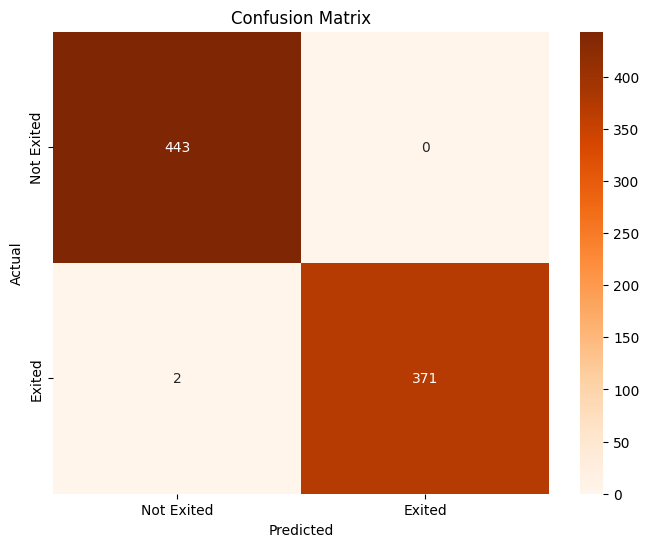

In [75]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

#Using the model with the best performance
trained_model=LogisticRegression(random_state=42, max_iter=1000)
trained_model.fit(X_train, Y_train)
predict = trained_model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(Y_test, predict)

print(evaluate_model(trained_model, X_train, Y_train, X_test, Y_test))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=['Not Exited', 'Exited'], yticklabels=['Not Exited', 'Exited'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Saving Answers

In [76]:
# Create a DataFrame with the actual and predicted values
answers = pd.DataFrame({'Actual': Y_test, 'Predicted': predict})

# Save the answers to a CSV file
answers.to_csv('answers_customer_churn.csv', index=False)

### Save The Trained Model

In [77]:
import joblib

# Save the model to a file
model_filename = 'customer_churn_model.pkl'
joblib.dump(trained_model, model_filename)

print(f"Model saved to {model_filename}")


Model saved to customer_churn_model.pkl
